In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import os
os.getcwd()

'C:\\Users\\mandapmr\\Desktop\\Python-Learning-Creating-Algorithms-from-scratch'

In [2]:
#changing working directory to point to file location
os.chdir('C:\\Users\\mandapm\\Documents\\CS Class\\assgn2')

In [3]:
# MNIST training images are downloaded and loaded as training_images 
training_images_file = open('train-images-idx3-ubyte','rb')
training_images = training_images_file.read()
training_images_file.close()

In [4]:
# MNIST training labels are downloaded and loaded as training_labels
training_labels_file = open('train-labels-idx1-ubyte','rb')
training_labels = training_labels_file.read()
training_labels_file.close()

In [5]:
# MNIST test images are downloaded and loaded as test_images 
test_images_file = open('t10k-images-idx3-ubyte','rb')
test_images = test_images_file.read()
test_images_file.close()

In [6]:
# MNIST test labels are downloaded and loaded as test_labels 
test_labels_file = open('t10k-labels-idx1-ubyte','rb')
test_labels = test_labels_file.read()
test_labels_file.close()

In [7]:
#byte array function is used to convert to mutable array of bytes
training_images = bytearray(training_images)
training_labels = bytearray(training_labels)
test_images = bytearray(test_images)
test_labels = bytearray(test_labels)

In [8]:
# Removing the descriptor values and shaping training images to 60000*784 array
training_images = training_images[16:]
training_images = np.array(training_images)
train_X = training_images.reshape(60000,784)

In [9]:
# Removing the descriptor values and shaping training labels to 60000*1 array
training_labels = training_labels[8:]
training_labels = np.array(training_labels)
train_Y = training_labels.reshape(60000,1) 

In [10]:
# Removing the descriptor values and shaping test images to 10000*784 array
test_images = test_images[16:]
test_images = np.array(test_images)
test_X = test_images.reshape(10000,784)

In [11]:
# Removing the descriptor values and shaping test labels to 10000*1 array
test_labels = test_labels[8:]
test_labels = np.array(test_labels)
test_Y = test_labels.reshape(10000,1)

In [12]:
# Seperating the training data based on labels
train_XY = np.concatenate((train_X,train_Y),axis=1)
train_XY0 = train_XY[train_XY[:,784]==0]
train_XY1 = train_XY[train_XY[:,784]==1]
train_XY2 = train_XY[train_XY[:,784]==2]
train_XY3 = train_XY[train_XY[:,784]==3]
train_XY4 = train_XY[train_XY[:,784]==4]
train_XY5 = train_XY[train_XY[:,784]==5]
train_XY6 = train_XY[train_XY[:,784]==6]
train_XY7 = train_XY[train_XY[:,784]==7]
train_XY8 = train_XY[train_XY[:,784]==8]
train_XY9 = train_XY[train_XY[:,784]==9]

In [13]:
def plot_image(pixels: np.array):
    plt.imshow(pixels.reshape((28, 28)), cmap='winter')
    plt.show()

In [14]:
def euclidean_distancen(n,X1,X2):
    dist_near = np.full((n), np.Inf)
    near_point_idx = np.full((n), 0)
    x2 = np.array(X2,dtype = 'int')
    for i in range(len(X1[:,0])):
        x1 = np.array(X1[i],dtype = 'int')
        dist= np.sqrt(np.sum((x1-x2)**2))
        if dist < np.max(dist_near):
            dist_near[np.argmax(dist_near)] = dist
            near_point_idx[np.argmax(dist_near)]= i
    near_point_sorted = near_point_idx[np.argsort(dist_near)]
    return near_point_sorted

Best K = 3
Validation Accuracy = 0.9216666666666666
Test Accuracy = 0.9666666666666667
correctly classified  1


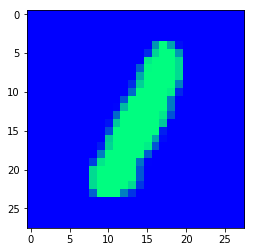

incorrectly classified  1


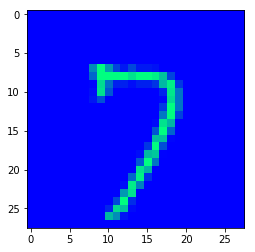

correctly classified  2


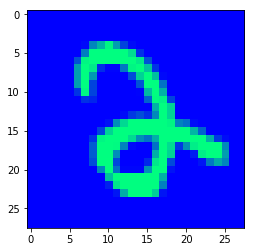

incorrectly classified  2


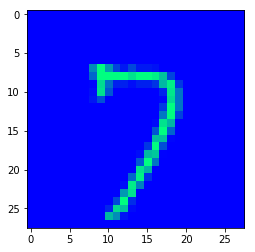

correctly classified  7


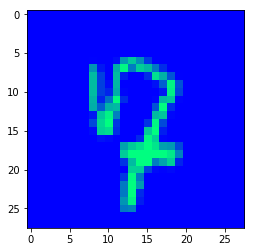

incorrectly classified  7


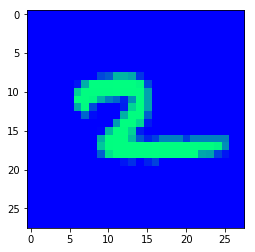

In [15]:
def problem3():
    indx = np.random.randint(low=0, high=5400, size=200)
    dataset_3= np.concatenate((train_XY1[indx,:],train_XY2[indx,:],train_XY7[indx,:]),axis =0)
    k_list = [1,3,5,7,9]
    valid_accuracy = np.zeros((5,5))
    for i in range(5):
        mask = range (120*i,120*(i+1),1)
        test_3P = dataset_3[mask]      
        train_3P = dataset_3[[i for i in range(600) if not i in mask]]
        Pred_Y,score = np.zeros((120,10)),np.zeros((120,10))
        for j in range(120):
            nearest_idx = euclidean_distancen(9,train_3P,test_3P[j])
            for k in k_list:
                nearest_ix = nearest_idx[0:k]
                uniq,counts = np.zeros((k)),np.zeros((k))
                uniq,counts = np.unique(train_3P[nearest_ix,784],return_counts = True)
                if max(counts) > 1:
                    Pred_Y[j,k] = uniq[np.argmax(counts)]
                else:
                    Pred_Y[j,k] = uniq[0]
                if Pred_Y[j,k] == test_3P[j,784]:
                    score[j,k] = True
        valid_accuracy[i] = [np.sum([score[:,1]])/120,np.sum([score[:,3]])/120,np.sum([score[:,5]])/120,np.sum([score[:,7]])/120,np.sum([score[:,9]])/120]        
    Accuracy = np.mean(valid_accuracy,axis = 0)
    print('Best K =',k_list[np.argmax(Accuracy)])
    print('Validation Accuracy =',np.max(Accuracy))
    K= k_list[np.argmax(Accuracy)]
    indxt = np.random.randint(low=0, high=5400, size=50)
    dataset_3T= np.concatenate((train_XY1[indxt,:],train_XY2[indxt,:],train_XY7[indxt,:]),axis =0)
    Pred_Y,score = np.zeros((120)),np.zeros((120))
    for j in range(120):
        nearest_ix = euclidean_distancen(K,train_3P,dataset_3T[j])
        uniq,counts = np.zeros((K)),np.zeros((K))
        uniq,counts = np.unique(train_3P[nearest_ix,784],return_counts = True)
        if max(counts) > 1:
                    Pred_Y[j] = uniq[np.argmax(counts)]
        else:
                    Pred_Y[j] = uniq[0]
        if Pred_Y[j] == dataset_3T[j,784]:
                    score[j] = True
    test_accuracy = np.sum(score)/120        
    print('Test Accuracy =',test_accuracy)
    for i in [1,2,7]:
        print('correctly classified ',i)
        row= np.min((np.where(Pred_Y[0:150]==i) and np.where(dataset_3T[:,784]==i)))
        plot_image(dataset_3T[row,0:784])
        print('incorrectly classified ',i)
        row= np.max((np.where(Pred_Y[0:150]==i) and np.where(dataset_3T[:,784]!=i)))
        plot_image(dataset_3T[row,0:784])


problem3()